# Corto # 2

Integrantes:

- Manuel Archila 161250

- Diego Franco 20240

## Parte 1 Preguntas Teóricas

1. **Defina los componentes de las Cadenas de Markov**

ELos componentes de las Cadenas de Markov son:

- Estados: Situanciones en las que se puede encontrar el sistema. 
- Probabilidades de transición: Probabilidades de pasar de un estado a otro
- Probabilidades de estado inicial: Probabilidad de iniciar el proceso en cada estado


2. **Defina por lo menos 3 propiedades de las Cadenas de Markov**

- Falta de Memoria: La probabilidad de un estado hacia un estado futuro solo depende del estado actual.
- Estados absorbentes: Son estados en los que una vez que se llega a ellos, no se puede salir, estos estados obtienen un valor de 1.
- Homogeneidad Temporal: La probabilidad de un estado hacia otro no cambia conforme pasa el tiempo.


3. **¿Por qué se suele usar procesos de Poisson para simular colas?**
- Se utiliza Poisson para simular las colas ya que permite la simulación de eventos aleatorios en un período de tiempo. 


4. **Defina las dos etapas que se suelen emplear para Simulation Optimization**
Las dos etapas que se emplean para la optimización de la simulación son:

- Primera etapa: Esta etapa lo que implica es encontrar las decisiones deterministas óptimas. Esto quiere decir que se busca encontrar los mejores parametros fijos para el sistema.

- Segunda etapa: Esta etapa lo que implica es encontrar las decisiones estocásticas óptimas. Esto quiere decir que se busca encontrar los mejores parametros aleatorios para el sistema.



C:\Users\diego\AppData\Local\Temp\ipykernel_12448\1903195609.py:25: DeprecationWarning: `salib.sample.saltelli` will be removed in SALib 1.5. Please use `salib.sample.sobol`
  param_values = saltelli.sample(problem, 1000)


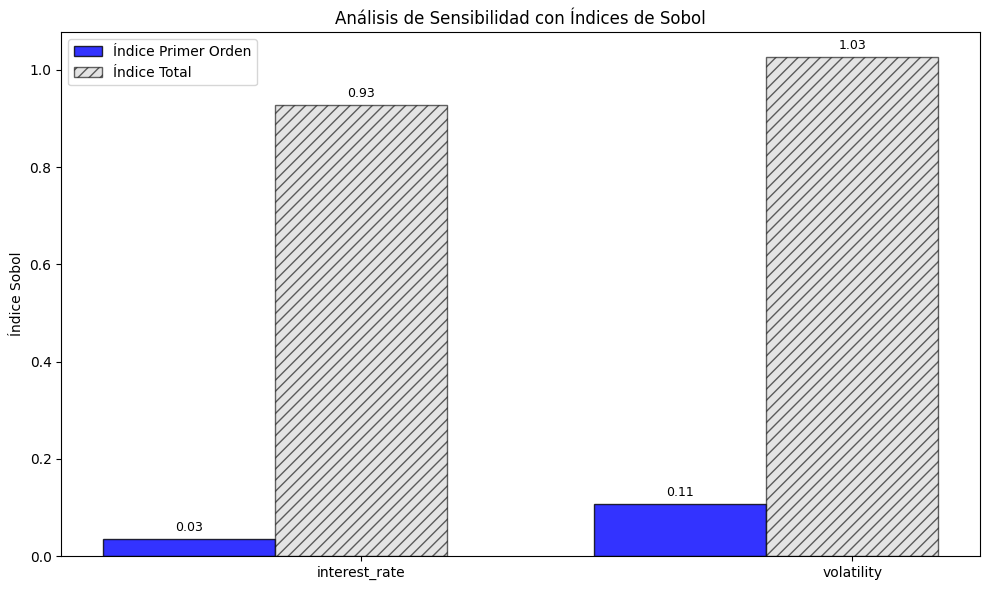

Sobol Indices (first order): [0.03490078 0.10716059]
Sobol Indices (total order): [0.92818984 1.02606969]


In [73]:
import numpy as np
from SALib.sample import saltelli
from SALib.analyze import sobol
import matplotlib.pyplot as plt
import random

np.random.seed(123)
# 1. Generación de flujos de caja aleatorios
def cash_flows(interest_rate, volatility):
    return np.random.normal(500000, 100000, 5) * (1 + interest_rate + volatility)

# 2. Descuento de los flujos de caja
def npv(flows, discount_rate=0.1):
    years = np.arange(1, 6)
    discounted_flows = flows / (1 + discount_rate) ** years
    return np.sum(discounted_flows)

# 3. Análisis de sensibilidad con índices Sobol
problem = {
    'num_vars': 2,
    'names': ['interest_rate', 'volatility'],
    'bounds': [[0.08, 0.12], [0.15, 0.25]]
}

param_values = saltelli.sample(problem, 1000)

Y = np.zeros([param_values.shape[0]])

for i, params in enumerate(param_values):
    flows = cash_flows(params[0], params[1])
    Y[i] = npv(flows)

Si = sobol.analyze(problem, Y)
plt.figure(figsize=(10,6))

# Bar width
width = 0.35

# Posiciones de las barras
r1 = np.arange(len(problem['names']))
r2 = [x + width for x in r1]

# Barras para índices de primer orden con barras de error
bars1 = plt.bar(r1, Si['S1'], width=width, alpha=0.8, label='Índice Primer Orden', color='blue', edgecolor='black', capsize=7)

# Barras para índices totales con barras de error
bars2 = plt.bar(r2, Si['ST'], width=width, alpha=0.6, label='Índice Total', color='lightgray', edgecolor='black', capsize=7, hatch="///")

# Etiquetas de texto sobre las barras
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9, color='black')

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=9, color='black')

# Etiquetas, título y leyenda
plt.ylabel('Índice Sobol')
plt.title('Análisis de Sensibilidad con Índices de Sobol')
plt.xticks([r + width for r in range(len(Si['S1']))], problem['names'])
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


print("Sobol Indices (first order):", Si['S1'])
print("Sobol Indices (total order):", Si['ST'])

## Parte 2 Pregunta Práctica

1. **¿Qué tanto influye cada variable en el VPN?**

    Los valores de los índices Sobol de primer orden (S1) indican la influencia individual de cada variable en el VPN. En este caso, para la variable 'interest_rate', el índice S1 es aproximadamente 0.0349, y para la variable 'volatility', el índice S1 es aproximadamente 0.1072. Esto sugiere que 'volatility' tiene una influencia mayor en el VPN en comparación con 'interest_rate', ya que su índice S1 es más alto.

2. **¿Qué variable influye más? ¿Por qué cree que es esto?**

    La variable con más influencia en el VPN, basándose en los índices Sobol de primer orden, es 'volatility'. Esto se debe a que su índice S1 (0.1072) es más alto que el índice S1 de 'interest_rate' (0.0349). Debido a esta gran influencia, cuando los valores de volatility cambien tendrán un mayor impacto en el VPN.


3. **¿Hay una diferencia significativa en la influencia de cada variable? ¿Por qué?**

    Si existe una diferencia significativa para la influencia de las variables. La diferencia en los valores de los índices Sobol de primer orden (S1) entre 'volatility' y 'interest_rate' (0.1072 - 0.0349 = 0.0723) sugiere que 'volatility' tiene una influencia considerablemente mayor en el VPN que 'interest_rate'. Esto puede deberse a que los flujos de caja generados por el proyecto son más sensibles a los cambios en 'volatility' en comparación con 'interest_rate'.


4. **Si tuviera que hacer mejoras al análisis ¿qué podría hacer?**

    Una mejora al análisis sería aumentar el número de muestras para el análisis de sensibilidad. Esto permitiría obtener resultados más precisos y confiables. Además, se podría realizar un análisis de sensibilidad global para determinar la influencia de las variables en el VPN, en lugar de un análisis de sensibilidad local. Esto permitiría determinar la influencia de las variables en el VPN en todo el rango de valores de las variables, en lugar de solo en los valores de las muestras.

### Prompts Utilizados

1. Ayudame a simular  flujos de caja de inversión para cada escenario utilizando una distribución normal aleatoria con una media de 500000 y una desviación estándar de 100000. Descuente los flujos de caja a sus valores actuales utilizando la tasa de descuento en python.

2. Ahora como puedo hacer un analisis de sensibilidad global para determinar el impacto de las variaciones en la tasa de interés y la volatilidad en el VAN de la inversión. Por favor utiliza indices de Sobol  y apoyate de la libreria SALib

3. Finalmente, visualice los índices de sensibilidad de Sobol para comprender la importancia relativa de cada variable de entrada para influir en el VPN.

4. La visualizacion esta bastante simple, como puedo hacer para que me de mas informacion

5. Quiero que se vea unicamente el indice de primer orden y el indice total, pero que resalte el indice de primer orden